# Numerical operations with Numpy

1.  **Elementwise operations**
2.  **Basic reductions**
3.  **Broadcasting**
4.  **Array shape manipulation**
5.  **Sorting data**
6.  **Summary**


## Elementwise Operations

### Basic Stuff


#### With Scalars

<img src="figures/dtype-hierarchy.png">

In [1]:
import numpy as np

In [2]:
a = np.array([1,2,3,4])
a+1

array([2, 3, 4, 5])

In [3]:
2**a

array([ 2,  4,  8, 16])

#### All arithmetics element-wise operation 

In [4]:
b = np.ones(4) + 1
a - b

array([-1.,  0.,  1.,  2.])

In [5]:
a*b

array([2., 4., 6., 8.])

In [6]:
j = np.arange(10)
2**(j + 1) - j

array([   2,    3,    6,   13,   28,   59,  122,  249,  504, 1015])

#### ... and lets see how fast is Numpy compared to Python's in-built operations 

In [7]:
a = np.arange(10000)
%timeit a + 1

4.09 µs ± 154 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
p = range(10000)
%timeit [i + 1 for i in p]

600 µs ± 55.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Clearly, Numpy is winning hands down! 

Another thing about multiplication * VS matrix multiplication

In [9]:
c = np.ones((4,4))
c

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [10]:
c*c

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [11]:
np.dot(c, c)

array([[4., 4., 4., 4.],
       [4., 4., 4., 4.],
       [4., 4., 4., 4.],
       [4., 4., 4., 4.]])

In [12]:
# Or you can simply do
c.dot(c)

array([[4., 4., 4., 4.],
       [4., 4., 4., 4.],
       [4., 4., 4., 4.],
       [4., 4., 4., 4.]])

## More operations

### Comparisions

In [13]:
a = np.array([1,2,3,4])
b = np.array([5,2,6,4])
c = np.array([1,2,3,4])

In [14]:
a == b

array([False,  True, False,  True])

#### array-wise comparisons 

In [15]:
np.array_equal(a, b)

False

In [16]:
np.array_equal(a, c)

True

#### Logical operations 

In [17]:
a = np.array([1,1,0,0], dtype=bool)
b = np.array([1,0,1,0], dtype=bool)
np.logical_or(a,b)

array([ True,  True,  True, False])

In [18]:
np.logical_and(a,b)

array([ True, False, False, False])

In [19]:
np.logical_not(a,b)

array([False, False,  True,  True])

In [20]:
np.logical_xor(a,b)

array([ True,  True,  True,  True])

#### Trancendentaal functions: 

In [21]:
a = np.arange(5)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [22]:
np.log(a)

<ipython-input-22-89b6b8e53c58>:1: RuntimeWarning: divide by zero encountered in log
  np.log(a)


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436])

In [23]:
np.exp(a)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

#### Shape mismatches: 

Throws a broacasting error. We'll get to that soon enough...

In [24]:
a = np.arange(5)
a + np.array([2,4])

ValueError: operands could not be broadcast together with shapes (5,) (2,) 

#### Transposition. what is it?

In [25]:
a = np.triu(np.ones((4,4)), 1)
a

array([[0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])

In [26]:
a.T

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.]])

##### See, what happened above? 

It flipped upside-down and then right-to-left

### Food for thought

- Look at np.allclose versus np.isclose. What is the difference between the two according to you?
- What is the difference between np.trui and np.tril?
- Also play with Ranges: How is np.linspace different than np.logspace?


## Basic reductions

### Calculating sums

In [27]:
x = np.array([5,6,7,8])
np.sum(x)

26

#### Adding by rows and by columns 

In [28]:
x = np.array([[2,2,], [6,6]])
x

array([[2, 2],
       [6, 6]])

In [29]:
x.sum(axis=0) #column-wise addition, first dimension

array([8, 8])

In [30]:
# more complex way to doing it, but you get the idea
x[:, 0].sum(), x[:, 1].sum()

(8, 8)

In [31]:
# Le's do row-wise
x.sum(axis=1)

array([ 4, 12])

In [32]:
x[0, :].sum(), x[1, :].sum()

(4, 12)

In [33]:
# In higher dimensions
x = np.random.rand(2,2,2)
x

array([[[0.34592414, 0.15460061],
        [0.8683121 , 0.68157837]],

       [[0.23800664, 0.93651685],
        [0.9379463 , 0.69130543]]])

In [34]:
x.sum(axis=2)[0, 1]

1.5498904649649252

In [35]:
# inspecting it more in detail
x[0, 1, :].sum()

1.5498904649649252

### Other forms of reductions

#### Extrema

In [36]:
x = np.array([2,5,6])
x.min()

2

In [37]:
x.max()

6

In [38]:
x.argmin() # Index of mimimum

0

In [39]:
x.argmax() # index of maximum

2

#### Logic Functions for Truth Value Testing

**Numpy.all**

`all(a[, axis, out, keepdims])`	Test whether all array elements along a given axis evaluate to True.

Try help(numpy.all) for more details.

In [40]:
np.all([True, True, False])

False

In [41]:
np.all([[True, True], [False, True]])

False

In [42]:
np.all([[True, True], [False, True]], axis=0) #axis=1 should give you the opposite result as you'll see

array([False,  True])

In [43]:
np.all([-5, 4, 7])

True

In [44]:
np.all([1.0, np.nan])
# We'll get to np.nan - Not a number i.e; later

True

In [45]:
c = np.array([False])
d = np.all([-1, 4, 5], out=c, keepdims=True)
id(d), id(d), c

(140591000095120, 140591000095120, array([ True]))

#### Try the above operation with keepdims

What did you encounter? And why?



**Numpy.any**

`any(a[, axis, out, keepdims])`	Test whether any array element along a given axis evaluates to True.

In [46]:
np.any([True, True, False])

True

In [47]:
np.any([[True, False], [True, True]])

True

In [48]:
np.any([[True, False], [True, True]], axis=0)

array([ True,  True])

In [49]:
np.any([-1, 0, 7])

True

In [50]:
np.any(np.nan)

True

In [51]:
c = np.array([False])
d = np.any([-1, 4, 5], out=c, keepdims=True)
id(d), id(d), c

(140591000888144, 140591000888144, array([ True]))

In [52]:
d is c

True

In [53]:
id(d), id(c)

(140591000888144, 140591000888144)

In [54]:
c

array([ True])

In [55]:
# Can we try array comparisons?

a = np.zeros((200,200))

In [56]:
np.any(a != 0)

False

In [57]:
np.all( a == a)

True

In [58]:
a = np.array([3,4,5,6])
b = np.array([4,5,6,7])
c = np.array([6,7,3,2])
((a <= b) & (b <= c)).all() # np.all(((a <= b) & (b <= c)))

False

In [59]:
a <= b

array([ True,  True,  True,  True])

In [60]:
b <= c

array([ True,  True, False, False])

#### If we would have done `np.any()`...

What would then the answer be then?

In [61]:
((a <= b) & (b <= c)).any()

True

### Finite and Infinite

Test element-wise for finiteness and infinity

In [62]:
np.isfinite(1) # 1 is finite

True

In [63]:
np.isfinite(np.exp(100))

True

In [64]:
np.isfinite(np.exp(1000))

<ipython-input-64-5e887c69d6a8>:1: RuntimeWarning: overflow encountered in exp
  np.isfinite(np.exp(1000))


False

In [65]:
np.exp(1000)

<ipython-input-65-47a6eab891c2>:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000)


inf

#### Above is a limitation of my computer...

The answer should actually be true...

...**but** if we do `np.isinf()'

In [66]:
np.isinf(np.exp(1000))

<ipython-input-66-b70189efb4d4>:1: RuntimeWarning: overflow encountered in exp
  np.isinf(np.exp(1000))


True

In [67]:
np.isfinite(np.inf) # Kind of obvious as infinity is definitely NOT finite

False

In [68]:
np.isfinite([np.log(-1.), 1., np.log(0)]) # Trying same but in a different way...

<ipython-input-68-ee6f8431e4ab>:1: RuntimeWarning: invalid value encountered in log
  np.isfinite([np.log(-1.), 1., np.log(0)]) # Trying same but in a different way...
<ipython-input-68-ee6f8431e4ab>:1: RuntimeWarning: divide by zero encountered in log
  np.isfinite([np.log(-1.), 1., np.log(0)]) # Trying same but in a different way...


array([False,  True, False])

#### How about `np.NINF` 

In [69]:
help(np.NINF)

Help on float object:

class float(object)
 |  float(x=0, /)
 |  
 |  Convert a string or number to a floating point number, if possible.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __format__(self, format_spec, /)
 |      Formats the float according to format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __int__(self, /)
 |      int(self)
 |  
 |  __le__

In [70]:
np.isfinite(np.NINF)

False

In [71]:
np.isfinite(np.nan) # Remember, NaN = Not is number

False

In [72]:
x = np.array([-np.inf, 0., np.inf])
y = np.array([2,2,2])
np.isfinite(x, y)

array([0, 1, 0])

In [73]:
x

array([-inf,   0.,  inf])

In [74]:
y

array([0, 1, 0])

## Statistics - A quick brush up

In [75]:
a = np.array([5,6,7,8])
b = np.array([[1,2,3], [4,5,6]])

In [76]:
# Doing a simple pythonic mean
a.mean()

6.5

In [77]:
np.mean(a) # Numpy gives the same value

6.5

In [78]:
np.median(a) # OK, same

6.5

In [79]:
# Let's do for b
np.median(b) 

3.5

In [80]:
# For last axis
np.median(b, axis=-1)

array([2., 5.])

In [81]:
# for second last axis
np.median(b, axis=-2)

array([2.5, 3.5, 4.5])

#### Standard deviation


In [82]:
a.std()

1.118033988749895

In [83]:
b.std()

1.707825127659933

In [84]:
np.std(a)

1.118033988749895

In [85]:
c = np.array([[4,5], [8,9]])
np.std(c)

2.0615528128088303

In [86]:
c

array([[4, 5],
       [8, 9]])

In [87]:
np.std(c, axis=0)

array([2., 2.])

In [88]:
np.std(c, axis=-1)

array([0.5, 0.5])

In [89]:
np.std(c, axis=1)

array([0.5, 0.5])

#### But standard can also be inaccurate... 

In [90]:
c = np.zeros((2, 256*256), dtype=np.float16)

In [91]:
c[0, :] = 1.0

In [92]:
c[1, :] = 0.1

In [93]:
np.std(d)

0.0

##### What happened up there???

Now doing same with float32...

In [94]:
np.std(c, dtype=np.float32)

0.4500123

##### How about `np.float64`? 

In [95]:
np.std(c, dtype=np.float64)

0.45001220703125

##### `np.float128`?

In [96]:
np.std(c, dtype=np.float128) # as you can see the accuracy doesnt change as you increasing floating point.

0.45001220703125

### Working with some data

Let's look at the population of hares, lynxes and carrots in Northern Canada for a period of 20 years.

In [97]:
# Let's view the data
!cat data/populations.txt

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


In [98]:
# load the data
data = np.loadtxt('data/populations.txt')

In [99]:
data

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

In [100]:
year, hares, lynxes, carrots = data.T # What did I just do and why?

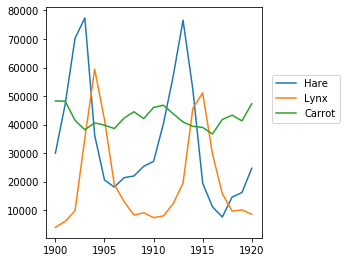

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.axes([0.2, 0.1, 0.5, 0.8])
plt.plot(year, hares, year, lynxes, year, carrots)
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

##### So what was mean (median) population over time?

In [102]:
pop = data[:, 1:]
pop.mean(axis=0)

array([34080.95238095, 20166.66666667, 42400.        ])

In [103]:
pop.std(axis=0)

array([20897.90645809, 16254.59153691,  3322.50622558])

##### Which animal had the highest population each year? 

In [104]:
np.argmax(pop, axis=1)

array([2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2])

### Diffusion using a random walk algorithm

<img src="figures/random_walk.png">

Let us consider a simple 1D random walk process: at each time step a walker jumps right or left with equal probability.


We are interested in finding the typical distance from the origin of a random walker after t left or right jumps? We are going to simulate many “walkers” to find this law, and we are going to do so using array computing tricks: we are going to create a 2D array with the “stories” (each walker has a story) in one direction, and the time in the other:
<img src="figures/random_walk_schema.png">

##### Step 1 : Let's initialize number of stories and max duration where we follow the walkers 

In [105]:
n_stories = 1000 # number of walkers
t_max = 200 # duration of time in which we follow the walkers

##### Step 2: Let's randomly choose all steps 1 or -1 of the walk 

In [106]:
t = np.arange(t_max)
steps = 2 * np.random.random_integers(0, 1, (n_stories, t_max)) - 1
# use instead np.random.randint(0, 1 + 1) logic

<ipython-input-106-49750b0ee743>:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  steps = 2 * np.random.random_integers(0, 1, (n_stories, t_max)) - 1


##### Step 3:  Lets verify if all steps are 1 or -1

In [107]:
np.unique(steps)

array([-1,  1])

##### Step 4: OK, we build the walks by summing steps along the time

In [108]:
positions = np.cumsum(steps, axis=1) # this is axis = 1, dimension of time
square_dist = np.square(positions)

##### Step 5: Lets get the mean in the axis of the stories

In [109]:
mean_square_dist = np.mean(square_dist, axis=0)

##### Step 6: Finally lets plot the results 

Text(0, 0.5, '$\\sqrt{\\langle (\\delta x)^2 \\rangle}$')

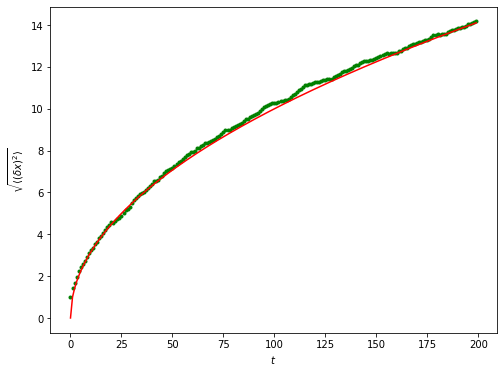

In [110]:
plt.figure(figsize=(8, 6))
plt.plot(t, np.sqrt(mean_square_dist), 'g.', t, np.sqrt(t), 'r-')
plt.xlabel(r"$t$")
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$")